In [74]:
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import scipy.constants as c
from scipy import stats

from photutils.aperture import CircularAperture
from photutils.detection import DAOStarFinder
from photutils.aperture import aperture_photometry
from photutils.aperture import CircularAnnulus

from astropy.utils.data import get_pkg_data_filename
from astropy.wcs import WCS
from astropy import wcs
from astropy.io import fits
from astropy.stats import sigma_clipped_stats
from astropy import units as u

import os
import sys
from astropy.table import Table, join, vstack
from astropy.nddata.utils import extract_array
import pyregion
import tqdm 
import argparse

import integratedflux as flux
import integratedflux_py3 as flux_py3

from importlib import reload
reload(flux)
import warnings
from astropy.utils.exceptions import AstropyWarning

import time
from regions import Regions

warnings.filterwarnings('ignore', category=AstropyWarning, append=True)

In [76]:
directory_univ_I = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/I_slices/'
directory_univ_Q = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/Q_slices/'
directory_univ_U = r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/U_slices/'

directory_local = r'/data2/goesaert/' 
directory_univ = r'/net/vdesk/data2/GoesaertW/Data_Analyis_Git/'
region_name = "Abell85_catalog_BDSF_adapbox_rsl.reg"
reg_file = Regions.read(region_name)

rsl = fits.open(get_pkg_data_filename(directory_univ+'Abell85_catalog_BDSF_adapbox_rsl.fits'))[1].data

In [77]:
hdul_image = fits.open('/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/I_slices/Abell_85_I_plane_freq01.fits')
hdul_flat = flux_py3.flatten(hdul_image)

head = hdul_flat.header
data = hdul_flat.data 
w  = wcs.WCS(head)

print(head)

SIMPLE  =                    T / conforms to FITS standard                      BITPIX  =                  -64 / array data type                                NAXIS   =                    2 / number of array dimensions                     NAXIS1  =                 3617                                                  NAXIS2  =                 3617                                                  WCSAXES =                    2 / Number of coordinate axes                      CRPIX1  =               1809.0 / Pixel coordinate of reference point            CRPIX2  =               1809.0 / Pixel coordinate of reference point            CDELT1  =        -0.0003317774 / [deg] Coordinate increment at reference point  CDELT2  =         0.0003317774 / [deg] Coordinate increment at reference point  CUNIT1  = 'deg'                / Units of coordinate increment and value        CUNIT2  = 'deg'                / Units of coordinate increment and value        CTYPE1  = 'RA---SIN'           / Right a

In [78]:
reload(flux_py3)

start = time.time()
source_num = len(rsl)
flux_measurements_I, flux_unc_I = np.zeros((12, source_num)), np.zeros((12, source_num))
flux_measurements_Q, flux_unc_Q = np.zeros((12, source_num)), np.zeros((12, source_num))
flux_measurements_U, flux_unc_U = np.zeros((12, source_num)), np.zeros((12, source_num))

for i in range(12):
    name = directory_univ_I+'Abell_85_I_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    name_rms = directory_univ_I+'Abell_85_I_RMS_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    hdul_image, hdul_image_RMS = fits.open(name), fits.open(name_rms)
    hdul_flat, hdul_flat_RMS = flux_py3.flatten(hdul_image), flux_py3.flatten(hdul_image_RMS)

    for n in tqdm.tqdm(range(source_num)):#range(len(rsl))):
        measurement = flux_py3.integratedflux(name, reg_file, n, hdul=hdul_flat)
        flux_measurements_I[i,n] = measurement[0]
        flux_unc_I[i,n] = flux_py3.uncertainty_flux(name_rms, measurement[0], measurement[1]\
                    , regionfile_rms=reg_file , delta_cal = 0.05, hdul=hdul_flat_RMS, rms_image=True)
        
    hdul_image.close()
    hdul_image_RMS.close()
print('I is done.')

for i in range(12):
    name = directory_univ_Q+'Abell_85_Q_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    name_rms = directory_univ_Q+'Abell_85_Q_RMS_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    hdul_image, hdul_image_RMS = fits.open(name), fits.open(name_rms)
    hdul_flat, hdul_flat_RMS = flux_py3.flatten(hdul_image), flux_py3.flatten(hdul_image_RMS)
    
    for n in tqdm.tqdm(range(source_num)):#range(len(rsl))):
        measurement = flux_py3.integratedflux(name, reg_file, n, hdul=hdul_flat)
        flux_measurements_Q[i,n] = measurement[0]
        flux_unc_Q[i,n] = flux_py3.uncertainty_flux(name_rms, measurement[0], measurement[1]\
                    , regionfile_rms=reg_file , delta_cal = 0.05, hdul=hdul_flat_RMS, rms_image=True)
        
    hdul_image.close()
    hdul_image_RMS.close()
print('Q is done.')

for i in range(12):
    name = directory_univ_U+'Abell_85_U_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    name_rms = directory_univ_U+'Abell_85_U_RMS_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits'
    hdul_image, hdul_image_RMS = fits.open(name), fits.open(name_rms)
    hdul_flat, hdul_flat_RMS = flux_py3.flatten(hdul_image), flux_py3.flatten(hdul_image_RMS)
    
    for n in tqdm.tqdm(range(source_num)):#range(len(rsl))):
        measurement = flux_py3.integratedflux(name, reg_file, n, hdul=hdul_flat)
        flux_measurements_U[i,n] = measurement[0]
        flux_unc_U[i,n] = flux_py3.uncertainty_flux(name_rms, measurement[0], measurement[1]\
                    , regionfile_rms=reg_file , delta_cal = 0.05, hdul=hdul_flat_RMS, rms_image=True)
        
    hdul_image.close()
    hdul_image_RMS.close()
print('U is done.')

end = time.time()
print("The time of execution of above program is :", end-start)

100%|██████████| 5572/5572 [01:43<00:00, 53.76it/s]


I is done.


100%|██████████| 5572/5572 [01:38<00:00, 56.73it/s]


Q is done.


100%|██████████| 5572/5572 [01:43<00:00, 53.65it/s]

U is done.
The time of execution of above program is : 3733.997079849243


In [79]:

savedir =r'/net/vdesk/data2/GoesaertW/Meerkat_Data/Abell_85/Photometry_BDSF/'

np.save(savedir+'Abell85_BDSF_I.npy', flux_measurements_I)
np.save(savedir+'Abell85_BDSF_Q.npy', flux_measurements_Q)
np.save(savedir+'Abell85_BDSF_U.npy', flux_measurements_U)
np.save(savedir+'Abell85_BDSF_unc_I.npy', flux_unc_I)
np.save(savedir+'Abell85_BDSF_unc_Q.npy', flux_unc_Q)
np.save(savedir+'Abell85_BDSF_unc_U.npy', flux_unc_U)

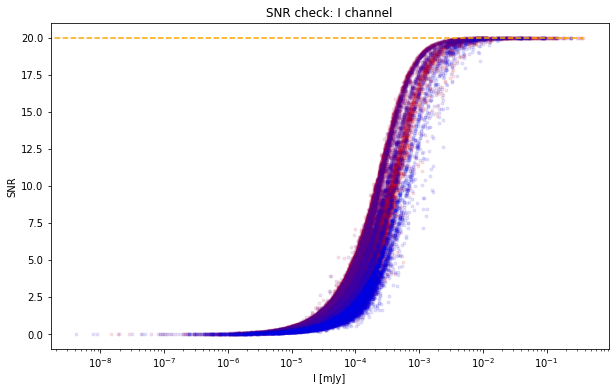

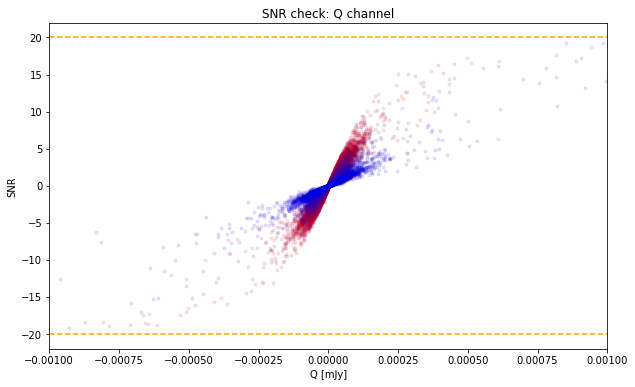

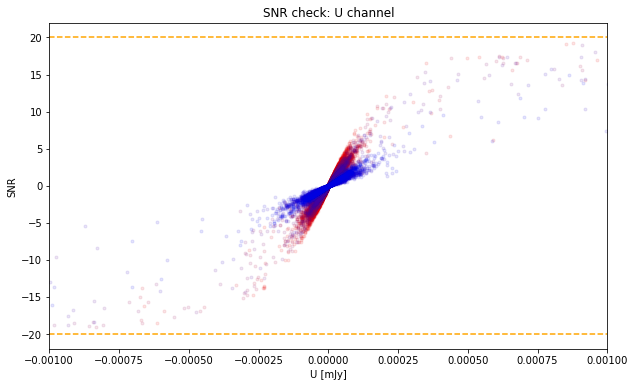

In [80]:
plt.figure(figsize=(10,6))
plt.title('SNR check: I channel')
for n in range(12):
    plt.scatter(flux_measurements_I[n,:], flux_measurements_I[n,:]/flux_unc_I[n,:], color=((11-n)/12,0,n/12), marker='.', label='Freq band '+str(n+1), alpha=0.1)
plt.hlines(20, 0, np.max(flux_measurements_I[0,:]), linestyle='dashed', color='orange')
plt.ylabel('SNR')
plt.xlabel('I [mJy]')
plt.xscale('log')
plt.ylim(-1,21)
plt.show()


plt.figure(figsize=(10,6))
plt.title('SNR check: Q channel')
for n in range(12):
    plt.scatter(flux_measurements_Q[n,:], flux_measurements_Q[n,:]/flux_unc_Q[n,:], color=((11-n)/12,0,n/12), marker='.', label='Freq band '+str(n+1), alpha=0.1)
plt.hlines([-20,20], -0.001, 0.001, linestyle='dashed', color='orange')
plt.ylabel('SNR')
plt.xlabel('Q [mJy]')
plt.xlim(-0.001,0.001)
plt.show()

plt.figure(figsize=(10,6))
plt.title('SNR check: U channel')
for n in range(12):
    plt.scatter(flux_measurements_U[n,:], flux_measurements_U[n,:]/flux_unc_U[n,:], color=((11-n)/12,0,n/12), marker='.', label='Freq band '+str(n+1), alpha=0.1)
plt.hlines([-20,20], -0.001, 0.001, linestyle='dashed', color='orange')
plt.ylabel('SNR')
plt.xlabel('U [mJy]')
plt.xlim(-0.001,0.001)
plt.show()

In [81]:
Linpol = np.sqrt(flux_measurements_Q**2 + flux_measurements_U**2)
Pol_Angles = 0.5*np.arctan(flux_measurements_U/flux_measurements_Q)

<ipython-input-81-9c748cedf266>:2: RuntimeWarning: invalid value encountered in true_divide
  Pol_Angles = 0.5*np.arctan(flux_measurements_U/flux_measurements_Q)


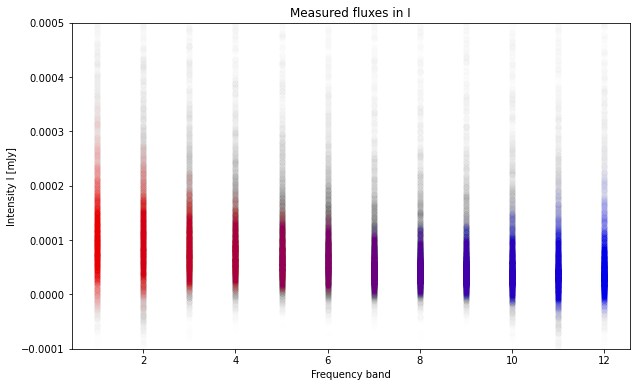

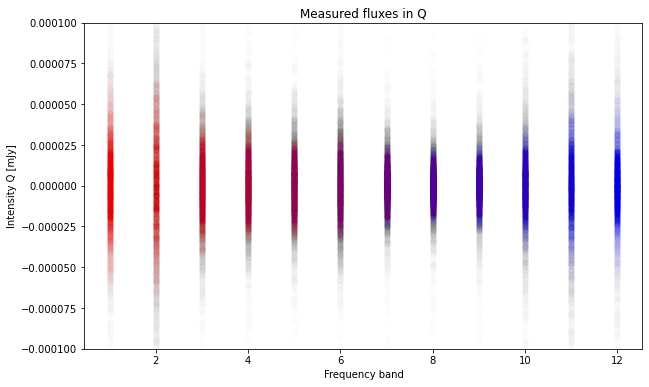

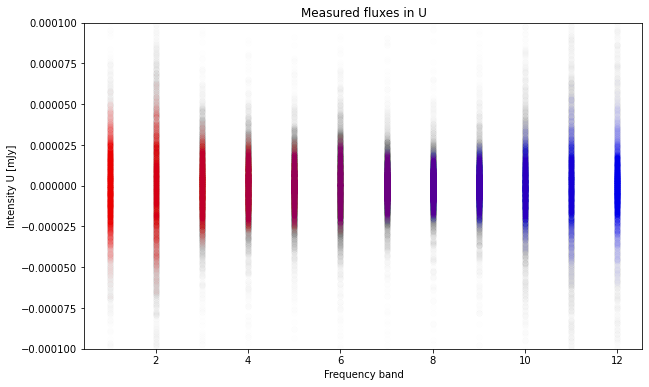

In [82]:
plt.figure(figsize=(10,6))
plt.title('Measured fluxes in I')
for n in range(12):
    plt.scatter((n+1)*np.ones(source_num), flux_measurements_I[n,:], color=((11-n)/12,0,n/12), label='Freq band '+str(n+1), alpha=0.005)
    plt.xlabel('Frequency band')
plt.ylabel('Intensity I [mJy]')
#plt.yscale('log')
#plt.xlim(1e-6, 1e-3)
#plt.ylim(1e-2, 1e2)
plt.ylim(-1e-4, 5e-4)
#plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.title('Measured fluxes in Q')
for n in range(12):
    plt.scatter((n+1)*np.ones(source_num), flux_measurements_Q[n,:], color=((11-n)/12,0,n/12), label='Freq band '+str(n+1), alpha=0.005)
    plt.xlabel('Frequency band')
plt.ylabel('Intensity Q [mJy]')
#plt.xlim(1e-6, 1e-3)
plt.ylim(-1e-4, 1e-4)
#plt.legend()
plt.show()

plt.figure(figsize=(10,6))
plt.title('Measured fluxes in U')
for n in range(12):
    plt.scatter((n+1)*np.ones(source_num), flux_measurements_U[n,:], color=((11-n)/12,0,n/12), label='Freq band '+str(n+1), alpha=0.005)
    plt.xlabel('Frequency band')
plt.ylabel('Intensity U [mJy]')
#plt.xlim(1e-6, 1e-3)
plt.ylim(-1e-4, 1e-4)
#plt.legend()
plt.show()

<ipython-input-84-31fe36229f9d>:4: RuntimeWarning: invalid value encountered in true_divide
  plt.scatter(flux_measurements_I[n], Linpol[n]/flux_measurements_I[n], color=((11-n)/12,0,n/12), label='Freq band '+str(n+1), s=0.5)


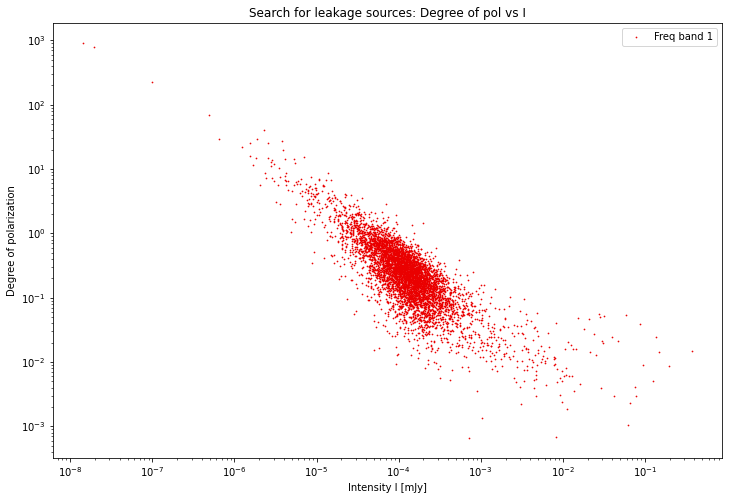

In [84]:
plt.figure(figsize=(12,8))
plt.title('Search for leakage sources: Degree of pol vs I')
for n in range(1):
    plt.scatter(flux_measurements_I[n], Linpol[n]/flux_measurements_I[n], color=((11-n)/12,0,n/12), label='Freq band '+str(n+1), s=0.5)
plt.xlabel('Intensity I [mJy]')
plt.ylabel('Degree of polarization')
plt.yscale('log')
plt.xscale('log')
#plt.xlim(1e-6, 1e-3)
#plt.ylim(1e-2, 1e2)
plt.legend()
plt.show()

In [18]:
reload(flux_py3)

i = 10

hdul_image = fits.open(directory_univ_I+'Abell_85_I_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits')
hdul_flat = flux_py3.flatten(hdul_image)
hdul_image_RMS = fits.open(directory_univ_I+'Abell_85_I_RMS_plane_freq'+(2-len(str((i+1))))*'0'+str(i+1)+'.fits')
hdul_flat_RMS = flux_py3.flatten(hdul_image_RMS)

for n in tqdm.tqdm(range(1)):#range(len(rsl))):
    measurement = flux_py3.integratedflux(directory_local+'Abell_85_I_plane_freq'\
                    +(2-len(str((i+1))))*'0'+str(i+1)+'.fits', reg_file, n, hdul=hdul_flat)
    flux_measurement = measurement[0]
    flux_unc = flux_py3.uncertainty_flux(directory_local+'Abell_85_I_RMS_plane_freq'\
                    +(2-len(str((i+1))))*'0'+str(i+1)+'.fits', measurement[0], measurement[1]\
                    , regionfile_rms=reg_file , delta_cal = 0.05, hdul=hdul_flat_RMS, rms_image=True)
hdul_image.close()

print(flux_measurement, flux_unc, flux_measurement/flux_unc)

100%|██████████| 1/1 [00:00<00:00, 24.84it/s]

0.00010374730679741182 6.423865953681589e-05 1.6150291358111715
